In [1]:
import pandas as pd

DADOS = '../dados/Mall_Customers_without_CustomerID.csv'

df = pd.read_csv(DADOS)

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


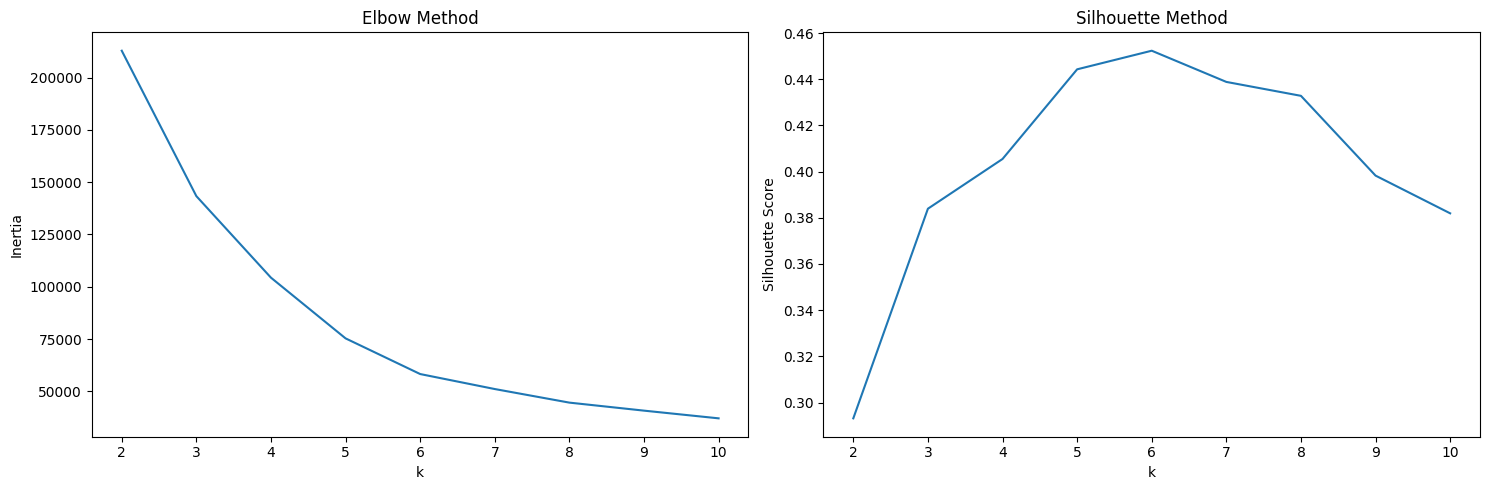

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5), tight_layout=True)

elbow = {}
silhouette = []

RANDOM_STATE = 42
k_range = range(2, 11)

X = df.drop('Gender', axis=1)

for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(X)
    elbow[i] = kmeans.inertia_

    labels = kmeans.labels_
    silhouette.append(silhouette_score(X, labels))

sns.lineplot(x=list(elbow.keys()), y=list(elbow.values()), ax=axs[0])
axs[0].set_xlabel('k')
axs[0].set_ylabel('Inertia')
axs[0].set_title('Elbow Method')

sns.lineplot(x=list(k_range), y=silhouette, ax=axs[1])
axs[1].set_xlabel('k')
axs[1].set_ylabel('Silhouette Score')
axs[1].set_title('Silhouette Method')

plt.show()





In [3]:
kmeans = KMeans(n_clusters=6, random_state=RANDOM_STATE, n_init=10)
kmeans.fit(X)
kmeans.labels_

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [4]:
# exportar o modelo
import joblib

joblib.dump(kmeans, "../modelos/kmeans.pkl")

['../modelos/kmeans.pkl']

In [5]:
df_clustered = df.copy()
df_clustered['cluster'] = kmeans.labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


In [6]:
df_clustered.to_csv("../dados/Mall_Customers_without_CustomerID_Clustered.csv", index=False)

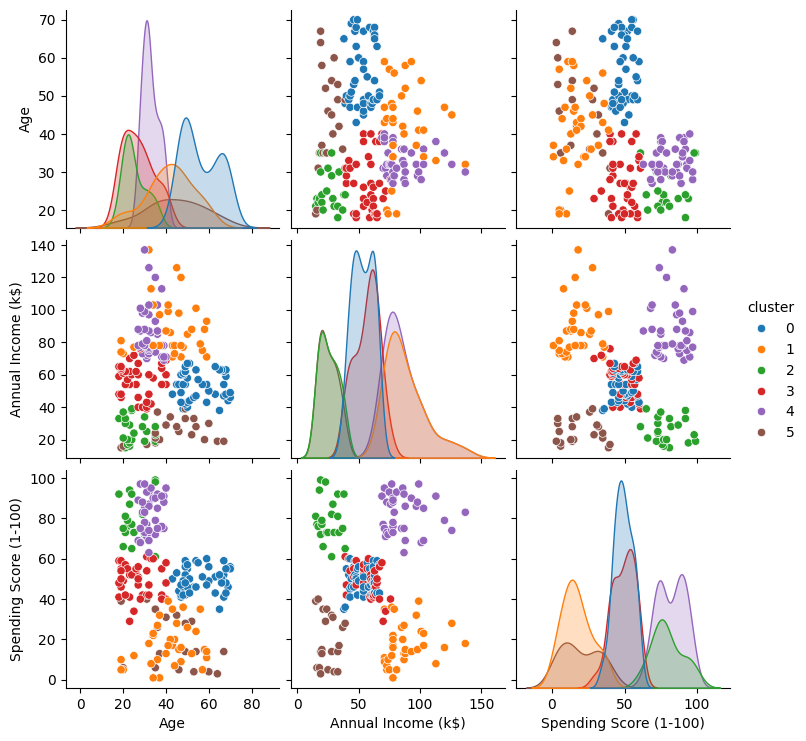

In [7]:
sns.pairplot(df_clustered, diag_kind="kde", hue="cluster", palette="tab10");

/tmp/ipykernel_25240/3533910109.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")
/tmp/ipykernel_25240/3533910109.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")
/tmp/ipykernel_25240/3533910109.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")


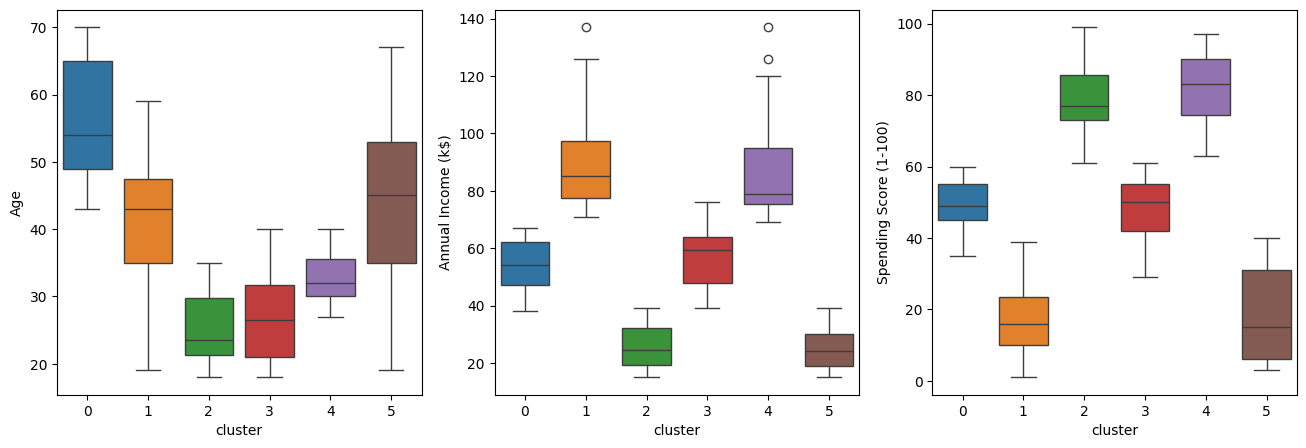

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")
    
plt.show()

- Cluster 0 - Pontuação de gastos moderada, renda moderada, idade alta 
- Cluster 1 - Pontuação de gastos baixa, renda alta, idade moderada 
- Cluster 2 - Pontuação de gastos alta, renda baixa, idade jovem 
- Cluster 3 - Pontuação de gastos moderada, renda moderada, idade jovem 
- Cluster 4 - Pontuação de gastos alta, renda alta, idade jovem 
- Cluster 5 - Pontuação de gastos baixa, renda baixa, idade moderada 

transformando os pontos acima em uma tabela:

Pontuação de gastos | Renda | Idade | Número Cluster
--- | --- | --- | ---
Moderada | Moderada | Alta | 0
Baixa | Alta | Moderada | 1
Alta | Baixa | Jovem | 2
Moderada | Moderada | Jovem | 3
Alta | Alta | Jovem | 4
Baixa | Baixa | Moderada | 5

In [9]:
df_clustered['cluster'].value_counts().sort_index()

cluster
0    45
1    35
2    22
3    38
4    39
5    21
Name: count, dtype: int64

In [10]:
# ver percentualmente cada cluster em relação ao total
df_clustered['cluster'].value_counts(normalize=True).multiply(100).reset_index()

,cluster,proportion
0,0,22.5
1,4,19.5
2,3,19.0
3,1,17.5
4,2,11.0
5,5,10.5


In [11]:
# verificar qual a quantidade de homens e mulheres em cada um dos clusters
df_clustered.groupby(['cluster', 'Gender']).size()

cluster  Gender
0        Female    25
         Male      20
1        Female    15
         Male      20
2        Female    13
         Male       9
3        Female    25
         Male      13
4        Female    21
         Male      18
5        Female    13
         Male       8
dtype: int64

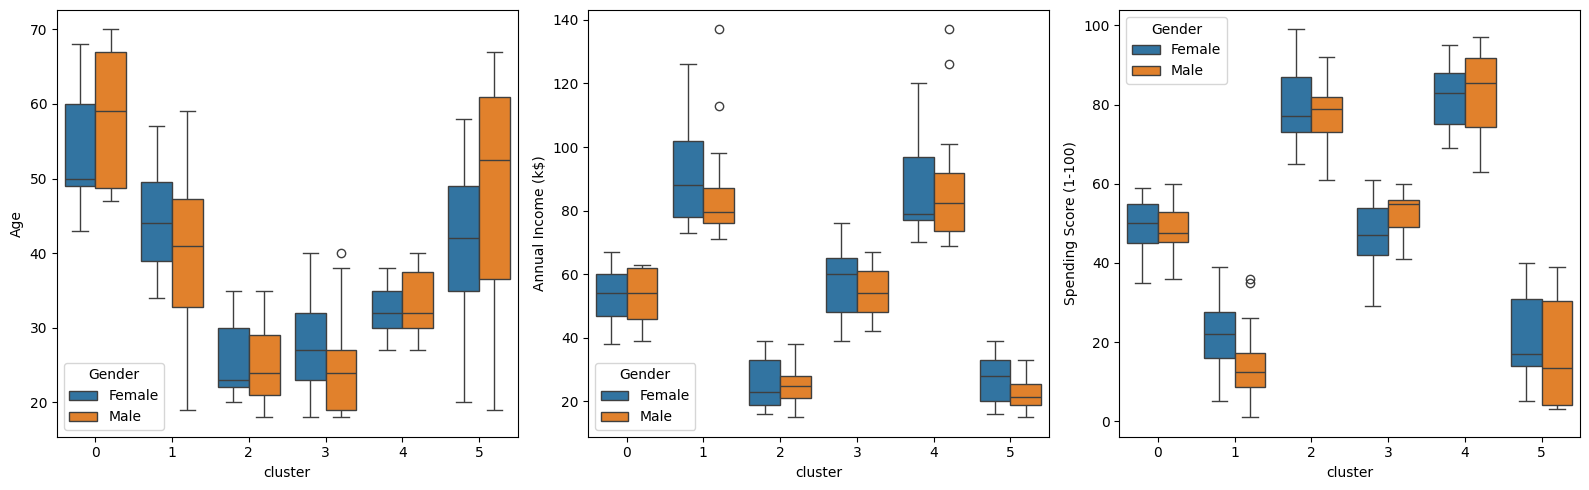

In [12]:
# fazer boxplots e separar por gênero
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 5), tight_layout=True)

for ax, col in zip(axs, df_clustered.select_dtypes('number')):
    sns.boxplot(x='cluster', y=col, data=df_clustered, ax=ax, hue = 'Gender')

plt.show()